<a href="https://colab.research.google.com/github/cr21/Unsupervised-Machine-Learning-Clustering/blob/main/PCA_Implementation_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from numpy import linalg as LA
from scipy.linalg import eigh 

In [3]:
def loadMNIST() :
  data= fetch_openml('mnist_784', version=1, return_X_y=False, )  
  X = data.data
  Y = data.target
  target_names = data.target_names
  featureNames =  data.feature_names
  return X, Y, target_names, featureNames
  
X, Y, target_names, featureNames= loadMNIST()


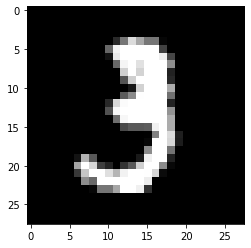

In [4]:
# Before normalization Image
sampleData = X[10]

sampleData = sampleData.reshape(28,28)
plt.imshow(sampleData,cmap='gray')

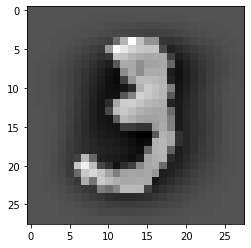

In [5]:
# After normalization Image
standardScaler = StandardScaler()
standardScaler.fit(X)
X = standardScaler.transform(X)
sampleData = X[10]
# print(sampleData)
sampleData = sampleData.reshape(28,28)
plt.imshow(sampleData,cmap='gray')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [39]:
# Covariance Matrix

X_train_Cov = np.cov(X_train.T)
X_test_Cov = np.cov(X_test.T)

In [117]:
# top 5 eigen values and eigen vectors
values, vectors = eigh(X_train_Cov, eigvals=(779,783))
# transformed features 


# top 5 eigen values for Test
values, vectors = eigh(X_test_Cov, eigvals=(779,783))
# transformed features 

transformed_X_train = np.matmul( X_train, vectors)
transformed_X_test = np.matmul( X_test, vectors)

In [122]:
logisticClassfierPCA = LogisticRegression(penalty='l2', tol =0.0001, C = 1.0,n_jobs=-1)
logisticClassfierPCA.fit(transformed_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
print(f"Custom PCA MNIST 5 Features train error : {logisticClassfierPCA.score(transformed_X_train, y_train)}")

Custom PCA MNIST 5 Features train error : 0.8681449893390192


In [124]:
print(f"Custom PCA MNIST 10 Features test error : {logisticClassfierPCA.score(transformed_X_test, y_test)}")

Custom PCA MNIST 10 Features test error : 0.8630735930735931


In [118]:
# top 20 eigen values and eigen vectors
values, vectors = eigh(X_train_Cov, eigvals=(764,783))
# transformed features 



# top 20 eigen values for Test
values, vectors = eigh(X_test_Cov, eigvals=(764,783))
# transformed features 

transformed_X_train = np.matmul( X_train, vectors)
transformed_X_test = np.matmul( X_test, vectors)

In [119]:
logisticClassfierPCA_20 = LogisticRegression(penalty='l2', tol =0.0001, C = 1.0,n_jobs=-1)
logisticClassfierPCA_20.fit(transformed_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
print(f"Custom PCA MNIST 20 Features train error : {logisticClassfierPCA_20.score(transformed_X_train, y_train)}")

Custom PCA MNIST 20 Features train error : 0.8681449893390192


In [121]:
print(f"Custom PCA MNIST 20 Features test error : {logisticClassfierPCA_20.score(transformed_X_test, y_test)}")

Custom PCA MNIST 20 Features test error : 0.8630735930735931
